<a href="https://colab.research.google.com/github/AnchitSharma/Data_Analysis_using_datasets/blob/master/IPTW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
np.random.seed(0)

In [29]:
df = pd.read_csv("/content/cross_sell_campaign_data.csv")
df.head()

,Unnamed: 0,Customer ID,Age,Income,Previous Purchases,Received Offer,Sales After Campaign
0,0,1,21,33470,0,No,226
1,1,2,24,63241,1,No,203
2,2,3,20,50447,9,Yes,246
3,3,4,55,76934,4,No,88
4,4,5,42,35196,0,No,178


In [30]:
df['Received Offer'] = [1 if x == "Yes" else 0 for x in df['Received Offer']]

In [31]:
# Logistic regression model
X = df[['Age', 'Income', 'Previous Purchases']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
X = np.asarray(X)
y = df['Received Offer'].values
logit_model = sm.Logit(y, X).fit()
df['P_Treatment'] = logit_model.predict(X)

Optimization terminated successfully.
         Current function value: 0.657334
         Iterations 5


Step 2: Calculate Weights

Calculate stabilized and nonstabilized weights.

In [16]:
# Overall probability of receiving the offer
P_T = df['Received Offer'].mean()

# Nonstabilized weights
df['W_Nonstabilized'] = 1 / df['P_Treatment']

# Stabilized weights
df['W_Stabilized'] = P_T / df['P_Treatment']

Step 3: Analyze Treatment Effect

Estimate the average treatment effect using weighted regression.

In [17]:
# Weighted regression for the average treatment effect
import statsmodels.api as sm

# Using Sales as the outcome variable
X = df[['W_Stabilized']]
X = sm.add_constant(X)
y = df['Sales After Campaign']
weighted_model = sm.WLS(y, X, weights=df['W_Stabilized']).fit()

# Summary of the results
print(weighted_model.summary())

                             WLS Regression Results                             
Dep. Variable:     Sales After Campaign   R-squared:                       0.002
Model:                              WLS   Adj. R-squared:                 -0.009
Method:                   Least Squares   F-statistic:                    0.1535
Date:                  Mon, 12 Aug 2024   Prob (F-statistic):              0.696
Time:                          18:15:09   Log-Likelihood:                -539.48
No. Observations:                   100   AIC:                             1083.
Df Residuals:                        98   BIC:                             1088.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          123.5789     

Step 4: Evaluate Confidence Intervals

Check the confidence intervals for the treatment effect estimate.

In [18]:
# Confidence intervals
conf_int = weighted_model.conf_int()
print(conf_int)

                       0           1
const         -32.771890  279.929782
W_Stabilized -124.018402  185.037983


###Conclusion

By applying IPTW, the company can determine how effective the cross-sell campaign was, adjusting for customer characteristics and ensuring a more accurate evaluation of the campaign's impact on sales. This method provides insights into whether the campaign should be continued or modified based on the results.

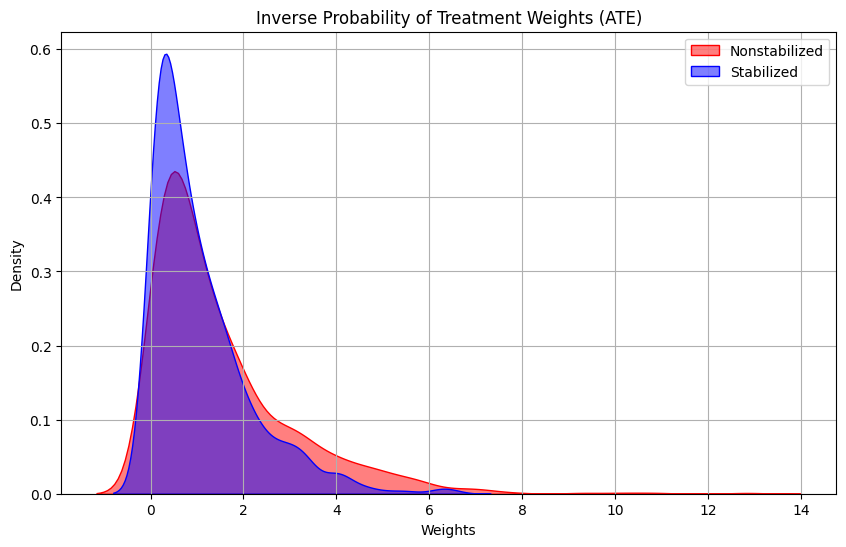

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated data for weights
nonstabilized_weights = np.random.exponential(scale=1.5, size=1000)
stabilized_weights = np.random.exponential(scale=1, size=1000)

# Create density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(nonstabilized_weights, color='red', fill=True, label='Nonstabilized', alpha=0.5)
sns.kdeplot(stabilized_weights, color='blue', fill=True, label='Stabilized', alpha=0.5)

# Adding labels and title
plt.title('Inverse Probability of Treatment Weights (ATE)')
plt.xlabel('Weights')
plt.ylabel('Density')
plt.legend()
plt.grid()

# Show plot
plt.show()